# What is OpenCV?
*  OpenCV is a Python image and video processing open source library, which is used for computer vision in 
Artificial intelligence, Machine Learning, face recognition, etc.
*  In OpenCV, the CV is an abbreviation form of a computer vision, which is defined as a field of study that helps computers to understand the content of the digital images such as photographs and videos.

# How does computer recognize the image?
* Human eyes provide lots of information based on what they see. Machines are facilitated with seeing everything, convert the vision into numbers and store in the memory. Here the question arises how computer convert images into numbers. 
* So the answer is that the pixel value is used to convert images into numbers. A pixel is the smallest unit of a digital image or graphics that can be displayed and represented on a digital display device.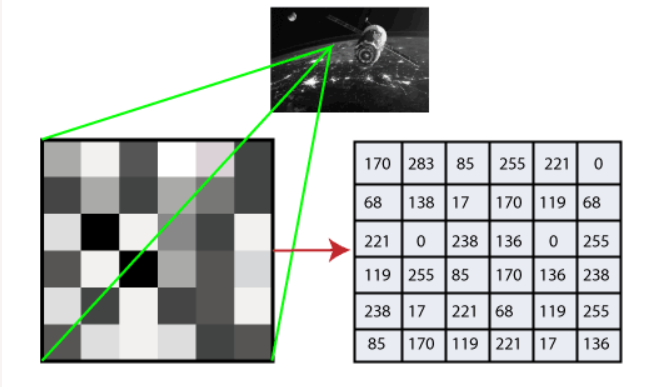
* The picture intensity at the particular location is represented by the numbers. In the above image, we have shown the pixel values for a grayscale image consist of only one value, the intensity of the black color at that location.
* For a coloured image, the combination of red, green and blue colour(RGB) together makes a new color. The computer retrieves that value from each pixel and puts the results in an array to be interpreted.

**Read and Save Images**

In [ ]:
import cv2  # This is our main OpenCV module using which we will do all the operations.

img = cv2.imread('watch.jpg',cv2.IMREAD_GRAYSCALE) 
# This imread command is used to read the images. 
# Here we are using IMREAD_GRAYSCALE as a parameter which is used for reading the image in grayscale.
# We can also use simple numbers as parameters like -1, 0, or 1. Color is 1, grayscale is 0, and the unchanged is -1.
img = cv2.imread('watch.jpg', 0)

cv2.imshow('image',img) # IMSHOW is used to show the image.
cv2.waitKey(0)          # Waitkey is used to wait until any key is pressed. 
cv2.destroyAllWindows() # To close everything when done.

cv2.imwrite('watchgray.png',img) # Imwrite is used to save the image.

**Basic Operations on Images**



In [ ]:
import cv2
img = cv2.imread('watch.jpg',cv2.IMREAD_COLOR)

px = img[1,1] # pixel values at height 1 and width 1 of image
print(px)

# We can also modify the pixel values 
img[1,1] = [255,255,255]
px = img[55,55]
print(px)

# We can also reference the region of image(ROI)
px = img[1:30,1:30]
print(px)

# We can also modify the ROI
img[1:30,1:30] = [255,255,255]

#We can reference certain characteristics of the image
print(img.shape)
print(img.size)
print(img.dtype)

roi = img[30:50,30:50]
img[0:20,0:20] = roi

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Drawing and Writing on Images**

In [ ]:

import cv2

img = cv2.imread('watch.jpg',cv2.IMREAD_COLOR)

cv2.line(img,(0,0),(200,300),(255,255,255),50) # Drawing a line on the image using start and end coordinates, colour and thickness of line.

cv2.rectangle(img,(500,250),(1000,500),(0,0,255),15) # Drawing a rectangle using top left and bottom right coordinates, colour and thickness of lines.

cv2.circle(img,(447,63), 63, (0,255,0), -1) # Drawing a circle using centre coordinates, radius, colour and thickness.

# Drawing a polygon
pts = np.array([[100,50],[200,300],[700,200],[500,100]], np.int32)
cv2.polylines(img, [pts], True, (0,255,255), 3)

#Writing on the image
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV Workshop!',(10,500), font, 6, (200,255,155), 13, cv2.LINE_AA)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Loading Video Source**

In [ ]:
import cv2

cap = cv2.VideoCapture(0) # This returns video from the first webcam of your computer.
 
while(True):
    ret, frame = cap.read() # Initiates an infinite loop, ret is a boolean which indicates whether something is return or not.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Here frame is converted to gray using BGR2GRAY attribute.
 
    cv2.imshow('frame',gray) # Using this to show the video stream
    if cv2.waitKey(1) & 0xFF == ord('q'): #This is used to break the while loop if we give a key and that key is for e.g, 'q' then we will exit from the while loop.
        break

cap.release()
cv2.destroyAllWindows()

**Thresholding in OpenCV**


*   The idea of thresholding is to further-simplify visual data for analysis.
*   Suppose we have a grayscale image. So thresholding in this image will convert everything to white or black, based on a threshold value. Let's say we want the threshold to be 125 (out of 255), then everything that was 125 and under would be converted to 0, or black, and everything above 125 would be converted to 255, or white.



In [ ]:
# A simple binary threshold
import cv2

img = cv2.imread('bookpage.jpg')
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY) #Threshold takes parameters image, threshold, max value and type of threshold.
retval, gray_threshold = cv2.threshold(grayscaled, 12, 255, cv2.THRESH_BINARY)
cv2.imshow('original',img)
cv2.imshow('threshold',threshold)
cv2.imshow('grayscale',gray_threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# An adaptive threshold which varies the threshold, also accounts for the curving of pages.
import cv2
img = cv2.imread('bookpage.jpg')
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow('original',img)
cv2.imshow('Adaptive threshold',th)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Colour Filtering in OpenCV**

In [ ]:
import cv2

cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # Frame is converted from BGR to Hue Saturation Value(HSV). HSV eases the process of filtering a specific colour.
    
    lower_skin = np.array([5,50,50]) # Low intensity skin colour
    upper_skin = np.array([15,255,255]) # High intensity skin colour
    
    mask = cv2.inRange(hsv, lower_skin, upper_skin) # Creates a mask of HSV frame in the range of lower_skin and upper_skin
    res = cv2.bitwise_and(frame,frame, mask= mask) # Creates a result by superimposing the mask on original frame 

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

**Canny Edge Detection**

In [ ]:
import cv2

cap = cv2.VideoCapture(0)
while(1):
    _, frame = cap.read()
    cv2.imshow('Original',frame)
    edges = cv2.Canny(frame,100,200) 
    # Using the Canny function to detect the edges. the arguements used are the original frame, threshold 1, threshold 2.
    #The smallest value between threshold1 and threshold2 is used for edge linking. The largest value is used to find initial segments of strong edges.
    cv2.imshow('Edges',edges)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

**Face and Eye Detection using HAAR Cascades**

In [ ]:
import cv2

# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

# Haar Cascades are different data files for various object detection such as face and eye detection.

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # We create a face cascade classifier using the haar cascade file.
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml') # We create a eye cascade classifier using the haar cascade file.

cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) # This functionality finds faces in the frame

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) # Drawing a rectangle around the face to show detected face.
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray) # This functionality finds eyes in the frame
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) # Drawing a rectangle around eyes.

    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()